# 4.10 Coding Etiquitte and Excel Reporting

In [3]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# establishing a path
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Data Immersion\Instacart Basket Analysis'

In [5]:
# importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9 ords_prods_cust_merge.pkl'))

In [6]:
df.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'department', 'Unnamed: 0_y', 'order_id',
       'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'First Name', 'Last Name', 'Gender', 'State',
       'Age', 'Date Joined', 'Number of Dependents', 'Family Status',
       'Income'],
      dtype='object')

In [7]:
#renaming columns for consistency
df.rename(columns={'First Name': 'first_name',
                   'Last Name': 'last_name',
                   'Gender': 'gender',
                   'State': 'state',
                   'Age': 'age',
                   'Date Joined': 'date_joined',
                   'Number of Dependents': 'number_of_dependents',
                   'Family Status': 'family_status',
                   'Income': 'income'}, inplace=True)

In [8]:
df.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'department', 'Unnamed: 0_y', 'order_id',
       'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'family_status',
       'income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0_x            int64   
 1   product_id              int64   
 2   product_name            object  
 3   aisle_id                int64   
 4   department_id           int64   
 5   prices                  float64 
 6   department              object  
 7   Unnamed: 0_y            int64   
 8   order_id                int64   
 9   user_id                 int64   
 10  eval_set                object  
 11  order_number            int64   
 12  orders_day_of_week      int64   
 13  order_hour_of_day       int64   
 14  days_since_prior_order  float64 
 15  add_to_cart_order       int64   
 16  reordered               int64   
 17  _merge                  category
 18  price_range_loc         object  
 19  busiest_day             object  
 20  busiest_days            object  
 21  busies

In [10]:
#changing data types to save memory
df['product_id'] = df['product_id'].astype('int32')
df['aisle_id'] = df['aisle_id'].astype('int32')
df['department_id'] = df['department_id'].astype('int16')
df['order_id'] = df['order_id'].astype('int32')
df['user_id'] = df['user_id'].astype('int32')
df['order_number'] = df['order_number'].astype('int8')
df['orders_day_of_week'] = df['orders_day_of_week'].astype('int16')
df['order_hour_of_day'] = df['order_hour_of_day'].astype('int16')
df['add_to_cart_order'] = df['add_to_cart_order'].astype('int32')
df['reordered'] = df['reordered'].astype('int32')
df['max_order'] = df['max_order'].astype('int32')
df['age'] = df['age'].astype('int16')
df['number_of_dependents'] = df['number_of_dependents'].astype('int8')
df['income'] = df['income'].astype('int32')
df['days_since_prior_order'] = df['days_since_prior_order'].astype('float32')
df['prices'] = df['prices'].astype('float32')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0_x            int64   
 1   product_id              int32   
 2   product_name            object  
 3   aisle_id                int32   
 4   department_id           int16   
 5   prices                  float32 
 6   department              object  
 7   Unnamed: 0_y            int64   
 8   order_id                int32   
 9   user_id                 int32   
 10  eval_set                object  
 11  order_number            int8    
 12  orders_day_of_week      int16   
 13  order_hour_of_day       int16   
 14  days_since_prior_order  float32 
 15  add_to_cart_order       int32   
 16  reordered               int32   
 17  _merge                  category
 18  price_range_loc         object  
 19  busiest_day             object  
 20  busiest_days            object  
 21  busies

In [12]:
#checking df
df.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,department,Unnamed: 0_y,order_id,user_id,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1987,3139998,138,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1989,1977647,138,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,11433,389851,709,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,12198,652770,764,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,12200,1813452,764,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [13]:
#checking columns
df.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'department', 'Unnamed: 0_y', 'order_id',
       'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'family_status',
       'income'],
      dtype='object')

In [14]:
#creating a crosstab
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [15]:
crosstab.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,20536,20441,17984,16438,16046,14384,13890,12774,11460,...,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,31674,29950,28010,27092,25533,24996,22921,21783,21067,...,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46454,46264,43902,40729,40907,38101,37519,35745,33830,...,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,61637,63388,59996,57882,56183,52869,49291,48295,47826,...,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,76733,78861,73540,70519,66569,62399,61143,59499,57700,...,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810


In [16]:
crosstab.to_clipboard()

## #2

In [18]:
# identifying potential PII columns
df.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'department', 'Unnamed: 0_y', 'order_id',
       'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'family_status',
       'income'],
      dtype='object')

In [19]:
# dropping 'last_ame' column for security
#also 'Unnamed: 0_x', 'Unnamed: 0_y', 'eval_set'
df = df.drop(columns=['last_name', 'Unnamed: 0_x', 'Unnamed: 0_y', 'eval_set'])

In [20]:
# checking results
df.head()

,product_id,product_name,aisle_id,department_id,prices,department,order_id,user_id,order_number,orders_day_of_week,...,spending_flag,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,3139998,138,28,6,...,Low spender,Frequent customer,Charles,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1977647,138,30,6,...,Low spender,Frequent customer,Charles,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,389851,709,2,0,...,Low spender,Frequent customer,Deborah,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,652770,764,1,3,...,Low spender,Frequent customer,Heather,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1813452,764,3,4,...,Low spender,Frequent customer,Heather,Female,Wisconsin,40,2/9/2020,3,married,31308


In [21]:
df.shape

(32404859, 31)

## #3

### A. Create region column from State

In [24]:
# define the state-to-region mapping
state_to_region = {
    'Maine': 'Northeast', 
    'New Hampshire': 'Northeast', 
    'Vermont': 'Northeast', 
    'Massachusetts': 'Northeast', 
    'Rhode Island': 'Northeast', 
    'Connecticut': 'Northeast', 
    'New York': 'Northeast', 
    'Pennsylvania': 'Northeast', 
    'New Jersey': 'Northeast',
    'Wisconsin': 'Midwest', 
    'Michigan': 'Midwest', 
    'Illinois': 'Midwest', 
    'Indiana': 'Midwest', 
    'Ohio': 'Midwest', 
    'North Dakota': 'Midwest', 
    'South Dakota': 'Midwest', 
    'Nebraska': 'Midwest', 
    'Kansas': 'Midwest', 
    'Minnesota': 'Midwest', 
    'Iowa': 'Midwest', 
    'Missouri': 'Midwest',
    'Delaware': 'South', 
    'Maryland': 'South', 
    'District of Columbia': 'South', 
    'Virginia': 'South', 
    'West Virginia': 'South', 
    'North Carolina': 'South', 
    'South Carolina': 'South', 
    'Georgia': 'South', 
    'Florida': 'South', 
    'Kentucky': 'South', 
    'Tennessee': 'South', 
    'Mississippi': 'South', 
    'Alabama': 'South', 
    'Oklahoma': 'South', 
    'Texas': 'South', 
    'Arkansas': 'South', 
    'Louisiana': 'South',
    'Idaho': 'West', 
    'Montana': 'West', 
    'Wyoming': 'West', 
    'Nevada': 'West', 
    'Utah': 'West', 
    'Colorado': 'West', 
    'Arizona': 'West', 
    'New Mexico': 'West', 
    'Alaska': 'West', 
    'Washington': 'West', 
    'Oregon': 'West', 
    'California': 'West', 
    'Hawaii': 'West'
}

In [25]:
# mapping by region, creating a column for region
df['region'] = df['state'].map(state_to_region)

In [26]:
#check results
df[['state', 'region']].head(20)

,state,region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Vermont,Northeast
3,Wisconsin,Midwest
4,Wisconsin,Midwest
5,Hawaii,West
6,District of Columbia,South
7,Tennessee,South
8,Oregon,West
9,Oregon,West


In [27]:
# group by 'Region' and 'spending_flag' and calculate mean prices
region_spending_stats = df.groupby(['region', 'spending_flag'])['prices'].mean().reset_index()

In [28]:
region_spending_stats

,region,spending_flag,prices
0,Midwest,High spender,8.297184
1,Midwest,Low spender,7.782094
2,Northeast,High spender,8.225516
3,Northeast,Low spender,7.773934
4,South,High spender,8.344387
5,South,Low spender,7.784122
6,West,High spender,8.340869
7,West,Low spender,7.779584


### Highest spenders in the Midwest, lowest in the Northeast.

## #4

In [31]:
# Count the number of orders per user
order_counts = df.groupby('user_id').size()

In [32]:
# Create a flag for low-activity customers (less than 5 orders)
low_activity_flag = order_counts < 5

In [33]:
# Add the flag to the original DataFrame
df['low_activity'] = df['user_id'].apply(lambda x: low_activity_flag[x])

In [34]:
# Exclude low-activity customers
filtered_df = df[~df['low_activity']]

In [35]:
# Drop the 'low_activity' column
filtered_df = filtered_df.drop(columns=['low_activity'])

In [36]:
filtered_df.head()

,product_id,product_name,aisle_id,department_id,prices,department,order_id,user_id,order_number,orders_day_of_week,...,order_frequency_flag,first_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,3139998,138,28,6,...,Frequent customer,Charles,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1977647,138,30,6,...,Frequent customer,Charles,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,389851,709,2,0,...,Frequent customer,Deborah,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,652770,764,1,3,...,Frequent customer,Heather,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1813452,764,3,4,...,Frequent customer,Heather,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest


In [37]:
filtered_df.shape

(32401975, 32)

In [38]:
# Export the filtered DataFrame
filtered_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 filtered_data.pkl'))

## #5

In [40]:
#create age variable
def profile_age(row):
    if row['age'] < 18: 
        return 'Under 18'
    elif row['age'] >= 18 and row['age'] <= 35: 
        return '18-35'
    elif row['age'] > 35 and row['age'] <= 65:
        return '35-65'
    elif row['age'] > 65:
        return '65+'

In [41]:
#create 'age_group' column
filtered_df['age_group'] = filtered_df.apply(profile_age, axis=1)

In [42]:
#create income variable
def profile_income(row):
    if row['income'] < 50000: 
        return 'A. Less than $50,000'
    elif row['income'] >= 50000 and row['income'] < 100000: 
        return 'B. $50,000-100,000'
    elif row['income'] >= 100000 and row['income'] < 250000: 
        return 'C. $100,000-250,000'
    elif row['income'] > 250000:
        return 'D. $250,000+'

In [43]:
#create 'income_group' column
filtered_df['income_group'] = filtered_df.apply(profile_income, axis=1)

In [44]:
#create family statue variable
def profile_family(row):
    if row['number_of_dependents'] == 0: 
        return 'Single Person'
    elif row['number_of_dependents'] <= 2: 
        return 'Small Family'
    elif row['number_of_dependents'] > 2:
        return 'Large Family'

In [45]:
#create 'family_status' column
filtered_df['family_size'] = filtered_df.apply(profile_family, axis=1)

In [46]:
filtered_df.head()

,product_id,product_name,aisle_id,department_id,prices,department,order_id,user_id,order_number,orders_day_of_week,...,state,age,date_joined,number_of_dependents,family_status,income,region,age_group,income_group,family_size
0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,3139998,138,28,6,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,65+,"A. Less than $50,000",Small Family
1,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1977647,138,30,6,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,65+,"A. Less than $50,000",Small Family
2,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,389851,709,2,0,...,Vermont,66,6/16/2018,2,married,158302,Northeast,65+,"C. $100,000-250,000",Small Family
3,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,652770,764,1,3,...,Wisconsin,40,2/9/2020,3,married,31308,Midwest,35-65,"A. Less than $50,000",Large Family
4,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1813452,764,3,4,...,Wisconsin,40,2/9/2020,3,married,31308,Midwest,35-65,"A. Less than $50,000",Large Family


In [47]:
# Export the profiled DataFrame
filtered_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 filtered_profiled_data.pkl'))

## #6

In [49]:
#test new variables, count occurances of new variables
filtered_df['age_group'].value_counts()

age_group
35-65    15168985
18-35     9145606
65+       8087384
Name: count, dtype: int64

In [50]:
filtered_df['age'].describe()

count    3.240198e+07
mean     4.946532e+01
std      1.848557e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [51]:
filtered_df['income_group'].value_counts()

income_group
C. $100,000-250,000     14631396
B. $50,000-100,000      13995009
A. Less than $50,000     3592990
D. $250,000+              182580
Name: count, dtype: int64

In [52]:
filtered_df['family_size'].value_counts()

family_size
Small Family     16170790
Large Family      8134436
Single Person     8096749
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, '18-35'), Text(1, 0, '35-65'), Text(2, 0, '65+')])

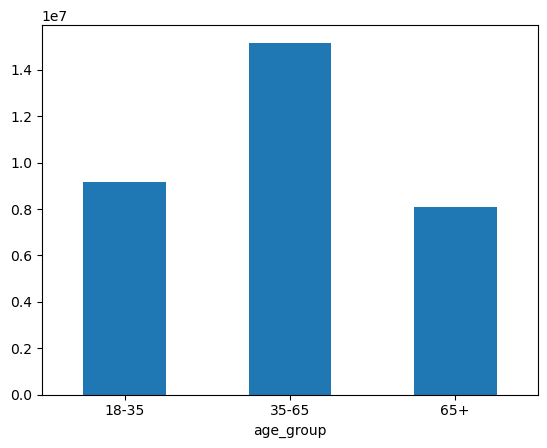

In [53]:
#create chart for each new variable
age_group_bar = filtered_df['age_group'].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'A. Less than $50,000'),
  Text(1, 0, 'B. $50,000-100,000'),
  Text(2, 0, 'C. $100,000-250,000'),
  Text(3, 0, 'D. $250,000+')])

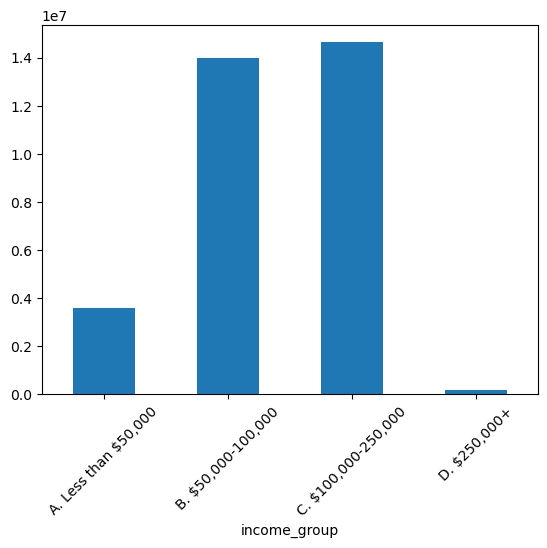

In [54]:
#create chart for each new variable
income_group_bar = filtered_df['income_group'].value_counts().sort_index().plot.bar()
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Large Family'),
  Text(1, 0, 'Single Person'),
  Text(2, 0, 'Small Family')])

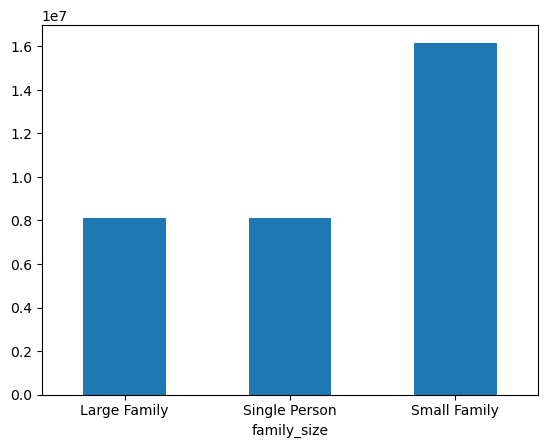

In [55]:
#create chart for each new variable
family_size_bar = filtered_df['family_size'].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)

In [56]:
#saving images
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_bar.png'))

In [57]:
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_bar.png'))

In [58]:
family_size_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_size_bar.png'))

## #7

In [60]:
# Group by 'age' and calculate the aggregate statistics for 'days_since_prior_order' and 'prices'
agg_age_stats = filtered_df.groupby('age_group').agg({
    'days_since_prior_order': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']
}).reset_index()

In [61]:
# Flatten the MultiIndex columns
agg_age_stats.columns = ['_'.join(col).strip() for col in agg_age_stats.columns.values]
agg_age_stats.rename(columns={'profile_': 'profile'}, inplace=True)

In [62]:
agg_age_stats

,age_group_,days_since_prior_order_max,days_since_prior_order_mean,days_since_prior_order_min,prices_max,prices_mean,prices_min
0,18-35,30.0,11.124232,0.0,25.0,7.785131,1.0
1,35-65,30.0,11.103279,0.0,25.0,7.792844,1.0
2,65+,30.0,11.080232,0.0,25.0,7.794336,1.0


In [63]:
# Group by 'income' and calculate the aggregate statistics for 'days_since_prior_order' and 'prices'
agg_income_stats = filtered_df.groupby('income_group').agg({
    'days_since_prior_order': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']
}).reset_index()

In [64]:
# Flatten the MultiIndex columns
agg_income_stats.columns = ['_'.join(col).strip() for col in agg_income_stats.columns.values]
agg_income_stats.rename(columns={'profile_': 'profile'}, inplace=True)

In [65]:
agg_income_stats

,income_group_,days_since_prior_order_max,days_since_prior_order_mean,days_since_prior_order_min,prices_max,prices_mean,prices_min
0,"A. Less than $50,000",30.0,11.584999,0.0,25.0,6.697611,1.0
1,"B. $50,000-100,000",30.0,11.048836,0.0,25.0,7.893859,1.0
2,"C. $100,000-250,000",30.0,11.049506,0.0,25.0,7.961412,1.0
3,"D. $250,000+",30.0,10.248461,0.0,25.0,7.777033,1.0


## #8

In [67]:
# Grouping the data by Region and Department to count the number of orders
region_department_group = filtered_df.groupby(['region', 'department']).agg({
    'order_id': 'count',      # Count of orders
    'prices': 'mean',         # Average price of orders
    'age': 'mean',            # Average age of customers
    'income': 'mean',         # Average income of customers
    'number_of_dependents': 'mean'  # Average number of dependents
}).reset_index()

In [68]:
region_department_group.head()

,region,department,order_id,prices,age,income,number_of_dependents
0,Midwest,alcohol,36178,8.121895,48.597850,106696.201863,1.443861
1,Midwest,babies,98981,7.612937,49.132722,102548.937867,1.471565
2,Midwest,bakery,273859,7.861494,49.500455,101689.644649,1.483380
3,Midwest,beverages,625415,7.684355,49.469987,97771.178923,1.492494
4,Midwest,breakfast,163543,8.021268,49.599445,98480.932073,1.489883


In [69]:
# Renaming the order_id column to order_count for clarity
region_department_group.rename(columns={'order_id': 'order_id_count'}, inplace=True)

In [70]:
region_department_group.head()

,region,department,order_id_count,prices,age,income,number_of_dependents
0,Midwest,alcohol,36178,8.121895,48.597850,106696.201863,1.443861
1,Midwest,babies,98981,7.612937,49.132722,102548.937867,1.471565
2,Midwest,bakery,273859,7.861494,49.500455,101689.644649,1.483380
3,Midwest,beverages,625415,7.684355,49.469987,97771.178923,1.492494
4,Midwest,breakfast,163543,8.021268,49.599445,98480.932073,1.489883


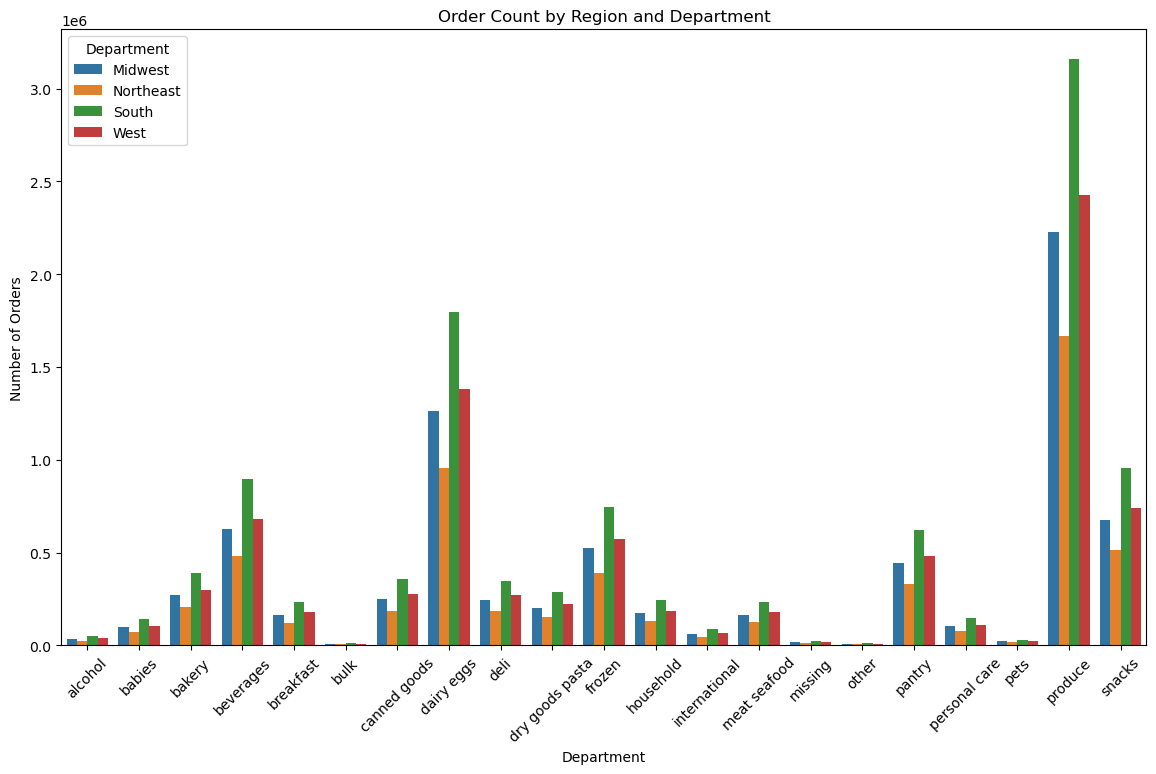

In [71]:
# Plotting Order Count by Region and Department
region_department_count_bar = plt.figure(figsize=(14, 8))
sns.barplot(x='department', y='order_id_count', hue='region', data=region_department_group)
plt.title('Order Count by Region and Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Department')
# Save the plot as a PNG file
region_department_count_bar = os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_count_bar.png')
plt.savefig(region_department_count_bar)

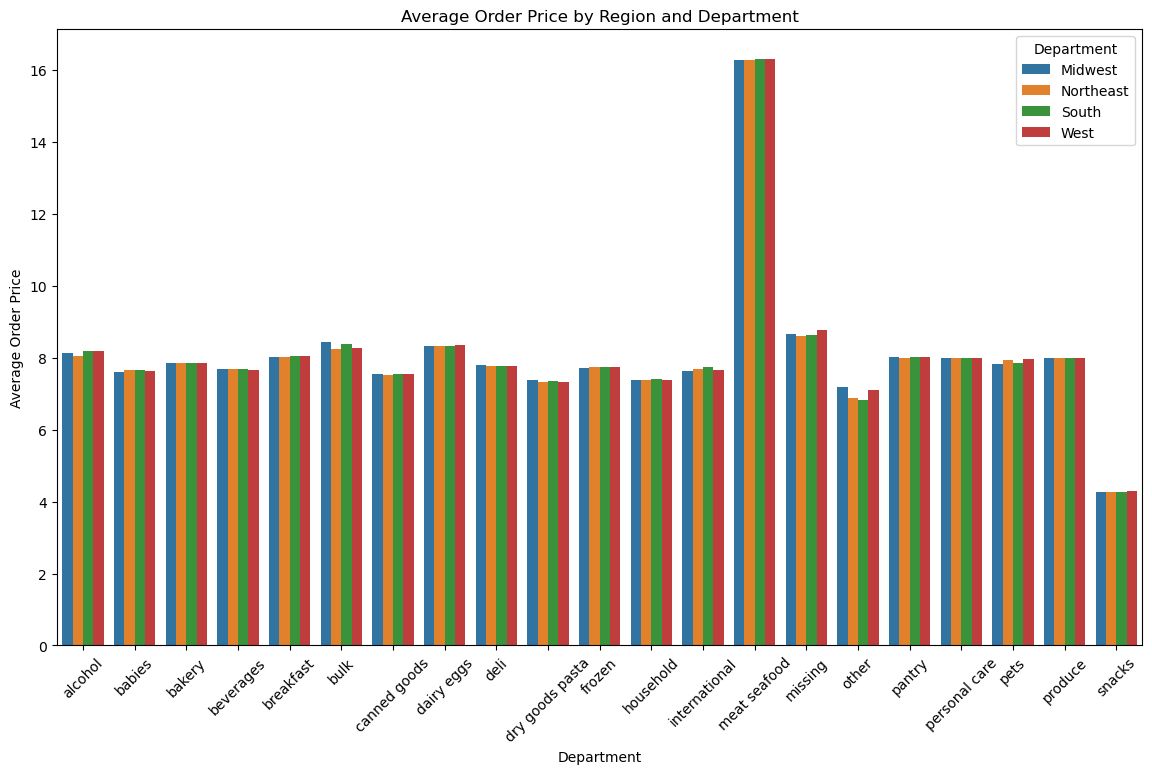

In [72]:
# Plotting Average Order Price by Region and Department
plt.figure(figsize=(14, 8))
sns.barplot(x='department', y='prices', hue='region', data=region_department_group)
plt.title('Average Order Price by Region and Department')
plt.xlabel('Department')
plt.ylabel('Average Order Price')
plt.xticks(rotation=45)
plt.legend(title='Department')
# Save the plot as a PNG file
region_department_price_bar = os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_price_bar.png')
plt.savefig(region_department_price_bar)

In [73]:
filtered_df.head()

,product_id,product_name,aisle_id,department_id,prices,department,order_id,user_id,order_number,orders_day_of_week,...,state,age,date_joined,number_of_dependents,family_status,income,region,age_group,income_group,family_size
0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,3139998,138,28,6,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,65+,"A. Less than $50,000",Small Family
1,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1977647,138,30,6,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,65+,"A. Less than $50,000",Small Family
2,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,389851,709,2,0,...,Vermont,66,6/16/2018,2,married,158302,Northeast,65+,"C. $100,000-250,000",Small Family
3,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,652770,764,1,3,...,Wisconsin,40,2/9/2020,3,married,31308,Midwest,35-65,"A. Less than $50,000",Large Family
4,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1813452,764,3,4,...,Wisconsin,40,2/9/2020,3,married,31308,Midwest,35-65,"A. Less than $50,000",Large Family


In [74]:
# Export the filtered DataFrame
filtered_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 filtered_profiled_data_avg.pkl'))